In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats

In [2]:
# Define date ranges
Dry_Season_Start_2 = pd.Timestamp('1/1/2020 0:00')
Wet_Season_Start = pd.Timestamp('5/1/2020 0:00')
Dry_Season_Start = pd.Timestamp('11/1/2020 0:00')

In [3]:
# Read a csv file with Pandas
data_1= pd.read_csv('West_Basin.csv')
data_4= pd.read_csv('West_Basin.csv').to_numpy()

# Display data
print("West Basin:", data_4.dtype, data_4.shape)
data_4

West Basin: object (35042, 8)


array([['1/1/2020 0:00', 2.58, 0.0, ..., 309943.0, 0.0, 1795.51],
       ['1/1/2020 0:15', 2.58, 0.0, ..., 309943.0, 0.0, 1795.51],
       ['1/1/2020 0:30', 2.58, 0.0, ..., 309943.0, 0.0, 1795.51],
       ...,
       ['12/30/2020 23:30', 2.62, 0.0, ..., 28702482.0, 0.0, 0.0],
       ['12/30/2020 23:45', 2.62, 0.0, ..., 28702482.0, 0.0, 0.0],
       ['12/31/2020 0:00', 2.62, 0.0, ..., 28702482.0, 0.0, 0.0]],
      dtype=object)

In [4]:

# Convert the "DATE" column to datetime format using pd.to_datetime()
data_1['Time America/New_York UTC-04:00'] = pd.to_datetime(data_1['Time America/New_York UTC-04:00'])

# Set the "DATE" column as the index of your DataFrame
data_1.set_index('Time America/New_York UTC-04:00', inplace=True)

#Display your DataFrame with `DATE` as index
display(data_1)

,Level (Stage) (ft),Flow Rate (ft3/s),Total Rain (in),Level (Stage) (ft).1,Discharge Volume (ft3),Flow Rate (ft3/s).1,Total Rain (in).1
Time America/New_York UTC-04:00,,,,,,,
2020-01-01 00:00:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51
2020-01-01 00:15:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51
2020-01-01 00:30:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51
2020-01-01 00:45:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51
2020-01-01 01:00:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51
...,...,...,...,...,...,...,...
2020-12-30 23:00:00,2.62,0.0,0.00,2.66,28702482.0,0.0,0.00
2020-12-30 23:15:00,2.62,0.0,0.00,2.66,28702482.0,0.0,0.00
2020-12-30 23:30:00,2.62,0.0,0.00,2.66,28702482.0,0.0,0.00


In [5]:
data_1.resample("ME").max()

,Level (Stage) (ft),Flow Rate (ft3/s),Total Rain (in),Level (Stage) (ft).1,Discharge Volume (ft3),Flow Rate (ft3/s).1,Total Rain (in).1
Time America/New_York UTC-04:00,,,,,,,
2020-01-31,2.60,65.9,30.33,2.62,309943.0,0.0,1795.51
2020-02-29,2.54,85.1,29.31,2.41,620056.0,142.7,1794.25
2020-03-31,2.16,0.0,28.41,1.97,620056.0,0.0,1793.13
2020-04-30,1.48,0.0,28.36,1.06,620056.0,0.0,1793.10
2020-05-31,1.36,0.0,26.63,1.07,620056.0,0.0,1791.22
2020-06-30,NaN,NaN,26.33,1.89,535053.0,0.0,498.02
2020-07-31,2.73,142.5,23.93,2.42,535053.0,0.0,498.02
2020-08-31,2.80,134.6,19.66,2.94,10145101.0,141.0,491.63
2020-09-30,4.00,269.5,13.87,4.10,146689777.0,755.5,486.86


In [6]:
Data_W = data_1.copy()

In [7]:
Data_W["Discharge Volume (L)"] = Data_W["Discharge Volume (ft3)"]*28.3168

In [8]:
# Group by month, calculate max and min values, and compute the difference
monthly_changes_W= Data_W.resample('ME').apply(lambda x: x.max() - x.min())

# Rename the new column
monthly_changes_W.rename(columns={'Discharge Volume (L)': 'Change in Discharge (L)'}, inplace=True)

# Merge the calculated changes back to the original DataFrame
Data_W = pd.merge(Data_W, monthly_changes_W, how='left', left_index=True, right_index=True)
Data_W

,Level (Stage) (ft)_x,Flow Rate (ft3/s)_x,Total Rain (in)_x,Level (Stage) (ft).1_x,Discharge Volume (ft3)_x,Flow Rate (ft3/s).1_x,Total Rain (in).1_x,Discharge Volume (L),Level (Stage) (ft)_y,Flow Rate (ft3/s)_y,Total Rain (in)_y,Level (Stage) (ft).1_y,Discharge Volume (ft3)_y,Flow Rate (ft3/s).1_y,Total Rain (in).1_y,Change in Discharge (L)
Time America/New_York UTC-04:00,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51,8.776594e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:15:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51,8.776594e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:30:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51,8.776594e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:45:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51,8.776594e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,2.58,0.0,30.33,2.62,309943.0,0.0,1795.51,8.776594e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 23:00:00,2.62,0.0,0.00,2.66,28702482.0,0.0,0.00,8.127624e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30 23:15:00,2.62,0.0,0.00,2.66,28702482.0,0.0,0.00,8.127624e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30 23:30:00,2.62,0.0,0.00,2.66,28702482.0,0.0,0.00,8.127624e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Select the numeric columns that you want
columns_to_keep_W =  ['Discharge Volume (L)', 'Change in Discharge (L)']

#Apply mean to numeric columns 
Data_W_Final = Data_W[columns_to_keep_W].resample('ME').max()
Data_W_Final

,Discharge Volume (L),Change in Discharge (L)
Time America/New_York UTC-04:00,,
2020-01-31,8.776594e+06,8.776594e+06
2020-02-29,1.755800e+07,1.755800e+07
2020-03-31,1.755800e+07,0.000000e+00
2020-04-30,1.755800e+07,0.000000e+00
2020-05-31,1.755800e+07,2.407013e+06
2020-06-30,1.515099e+07,0.000000e+00
2020-07-31,1.515099e+07,0.000000e+00
2020-08-31,2.872768e+08,2.721258e+08
2020-09-30,4.153785e+09,4.153785e+09


In [10]:
print('The total discharge in the west basin is:') 
Data_W_Final['Change in Discharge (L)'].sum()

The total discharge in the west basin is:


5279921220.1119995

In [11]:
# Extracting first column as datetime (you can do it in one line)
dates_W=data_4[:, 0]  # object
print("West dates:", dates_W.dtype, dates_W.shape)
dates_W

West dates: object (35042,)


array(['1/1/2020 0:00', '1/1/2020 0:15', '1/1/2020 0:30', ...,
       '12/30/2020 23:30', '12/30/2020 23:45', '12/31/2020 0:00'],
      dtype=object)

In [12]:
dates_W1=pd.to_datetime(dates_W)

In [13]:
# Extract numerical values as numbers (you can do it in one line)
multiplier = 28.3168
values_W = data_4[:, 5]*multiplier # converting ft3 to Liters
print("West values:", values_W.dtype, values_W.shape)
values_W

West values: object (35042,)


array([8776593.942400001, 8776593.942400001, 8776593.942400001, ...,
       812762442.2976, 812762442.2976, 812762442.2976], dtype=object)

In [14]:
#Original dataset information
print("Original data shape: data", data_4.shape, 
      "dates", dates_W1.shape,"values", values_W.shape)


Original data shape: data (35042, 8) dates (35042,) values (35042,)


In [15]:
Wet_season_filtered_dates_W = dates_W1[(dates_W1>=Wet_Season_Start) & (dates_W1 <= Dry_Season_Start)]
Wet_season_filtered_values_W = values_W[(dates_W1 >= Wet_Season_Start) & (dates_W1 <= Dry_Season_Start)]

In [16]:
Wet_season_filtered_values_W

array([17558001.7408, 17558001.7408, 17558001.7408, ...,
       464001661.62880003, 464001661.62880003, 464001661.62880003],
      dtype=object)

In [17]:
Dry_season_filtered_dates_Late_W = dates_W1[(dates_W1 >= Dry_Season_Start)]
Dry_season_filtered_values_Late_W = values_W[(dates_W1 >= Dry_Season_Start)]
Dry_season_filtered_dates_Early_W = dates_W1[(dates_W1 <= Wet_Season_Start)]
Dry_season_filtered_values_Early_W = values_W[(dates_W1 <= Wet_Season_Start)]

In [18]:
Dry_season_filtered_values_Early_W

array([8776593.942400001, 8776593.942400001, 8776593.942400001, ...,
       17558001.7408, 17558001.7408, 17558001.7408], dtype=object)

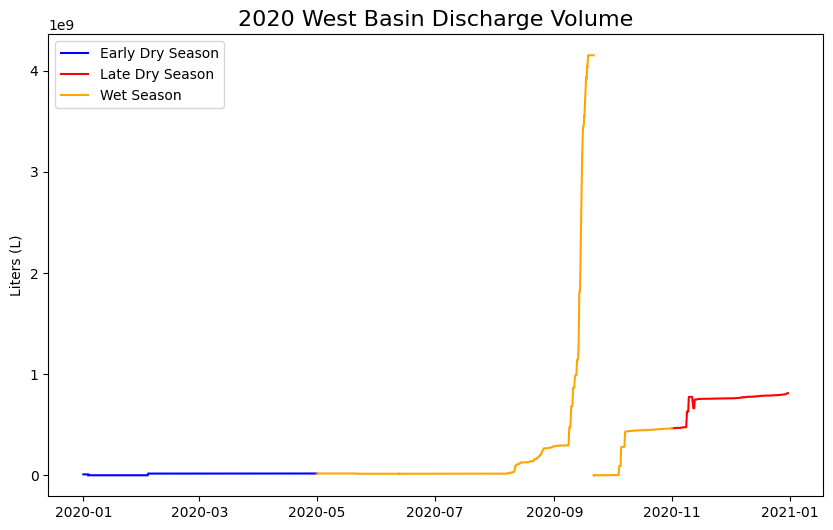

In [19]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6), sharex=True)
ax.set_title('2020 West Basin Discharge Volume', fontsize=16)
# Plot times as x-variable and parameters
ax.plot(Dry_season_filtered_dates_Early_W,Dry_season_filtered_values_Early_W,
           label='Early Dry Season', color='blue'); 
ax.plot(Dry_season_filtered_dates_Late_W,Dry_season_filtered_values_Late_W, 
           label='Late Dry Season', color='red' ); 
ax.plot(Wet_season_filtered_dates_W,Wet_season_filtered_values_W, label= 'Wet Season', color='orange');  
ax.set_ylabel('Liters (L)')
ax.legend(loc='upper left');

In [20]:
# Read a csv file with Pandas
data_2= pd.read_csv('East_Basin.csv')
data_5= pd.read_csv('East_Basin.csv').to_numpy()


# Display data
print("East Basin:", data_5.dtype, data_5.shape)
print(data_5[0])
data_5

East Basin: object (31678, 8)
['1/1/2020 0:00' 0 0 0.0 0.0 0 0 2.58]


array([['1/1/2020 0:00', 0, 0, ..., 0, 0, 2.58],
       ['1/1/2020 0:15', 0, 0, ..., 0, 0, 2.58],
       ['1/1/2020 0:30', 0, 0, ..., 0, 0, 2.58],
       ...,
       ['12/30/2020 23:30', 1061, 0, ..., 0, 141433890, 2.62],
       ['12/30/2020 23:45', 1061, 0, ..., 0, 141433890, 2.62],
       ['12/31/2020 0:00', 1061, 0, ..., 0, 143583639, 2.62]],
      dtype=object)

In [21]:
# Convert the "DATE" column to datetime format using pd.to_datetime()
data_2['DateTime'] = pd.to_datetime(data_2['DateTime'])

# Set the "DATE" column as the index of your DataFrame
data_2.set_index('DateTime', inplace=True)

#Display your DataFrame with `DATE` as index
display(data_2)

,MGallons,Flowate MGD,Discharge ft3,Flow Rate ft3/s,Add Volume ft3,Total Volume ft3,Level (Stage) ft
DateTime,,,,,,,
2020-01-01 00:00:00,0,0,0.0,0.0,0,0,2.58
2020-01-01 00:15:00,0,0,0.0,0.0,0,0,2.58
2020-01-01 00:30:00,0,0,0.0,0.0,0,0,2.58
2020-01-01 00:45:00,0,0,0.0,0.0,0,0,2.58
2020-01-01 01:00:00,0,0,0.0,0.0,0,0,2.58
...,...,...,...,...,...,...,...
2020-12-30 23:00:00,1061,0,141433890.0,0.0,0,141433890,2.62
2020-12-30 23:15:00,1061,0,141433890.0,0.0,0,141433890,2.62
2020-12-30 23:30:00,1061,0,141433890.0,0.0,0,141433890,2.62


In [22]:
data_2.resample("ME").min()

,MGallons,Flowate MGD,Discharge ft3,Flow Rate ft3/s,Add Volume ft3,Total Volume ft3,Level (Stage) ft
DateTime,,,,,,,
2020-01-31,0,-42,0.0,-64.5,0,0,2.18
2020-02-29,1,0,183559.0,0.0,0,183559,2.16
2020-03-31,3,0,354171.0,0.0,0,354171,1.47
2020-04-30,3,0,354171.0,0.0,0,354171,0.99
2020-05-31,3,0,354171.0,0.0,0,354171,0.94
2020-06-30,0,0,NaN,NaN,0,354171,NaN
2020-07-31,2,-14,322939.0,-21.6,0,322939,1.82
2020-08-31,0,-20,6508005.0,-30.7,0,6508005,1.90
2020-09-30,0,-44,14100312.0,-68.5,0,14100312,0.00


In [23]:
Data_E = data_2.copy()
Data_E["Discharge Volume (L)"] = Data_E["Total Volume ft3"]*28.3168

In [24]:
# Group by month, calculate max and min values, and compute the difference
monthly_changes_E= Data_E.resample('ME').apply(lambda x: x.max() - x.min())

# Rename the new column
monthly_changes_E.rename(columns={'Discharge Volume (L)': 'Change in Discharge (L)'}, inplace=True)

# Merge the calculated changes back to the original DataFrame
Data_E = pd.merge(Data_E, monthly_changes_E, how='left', left_index=True, right_index=True)
Data_E

,MGallons_x,Flowate MGD_x,Discharge ft3_x,Flow Rate ft3/s_x,Add Volume ft3_x,Total Volume ft3_x,Level (Stage) ft_x,Discharge Volume (L),MGallons_y,Flowate MGD_y,Discharge ft3_y,Flow Rate ft3/s_y,Add Volume ft3_y,Total Volume ft3_y,Level (Stage) ft_y,Change in Discharge (L)
DateTime,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0,0,0.0,0.0,0,0,2.58,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:15:00,0,0,0.0,0.0,0,0,2.58,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:30:00,0,0,0.0,0.0,0,0,2.58,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:45:00,0,0,0.0,0.0,0,0,2.58,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,0,0,0.0,0.0,0,0,2.58,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 23:00:00,1061,0,141433890.0,0.0,0,141433890,2.62,4.004955e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30 23:15:00,1061,0,141433890.0,0.0,0,141433890,2.62,4.004955e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30 23:30:00,1061,0,141433890.0,0.0,0,141433890,2.62,4.004955e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Select the numeric columns that you want
columns_to_keep_E = ['Discharge Volume (L)', 'Change in Discharge (L)']

#Apply mean to numeric columns 
Data_E_Final=Data_E[columns_to_keep_E].resample('ME').max()

In [26]:
print('The total discharge in the east basin is:') 
Data_E_Final['Change in Discharge (L)'].sum()

The total discharge in the east basin is:


4068716766.1984005

In [27]:
Data_E_Final

,Discharge Volume (L),Change in Discharge (L)
DateTime,,
2020-01-31,7.200991e+06,7.200991e+06
2020-02-29,1.002899e+07,4.831186e+06
2020-03-31,1.002899e+07,0.000000e+00
2020-04-30,1.002899e+07,0.000000e+00
2020-05-31,1.002899e+07,0.000000e+00
2020-06-30,1.002899e+07,NaN
2020-07-31,1.842859e+08,1.751413e+08
2020-08-31,3.992757e+08,2.149898e+08
2020-09-30,2.834322e+09,2.435046e+09


In [28]:
# Extracting first column as datetime (you can do it in one line)
dates_E=data_5[:, 0]  # object
print("East dates:", dates_E.dtype, dates_E.shape)
dates_E

East dates: object (31678,)


array(['1/1/2020 0:00', '1/1/2020 0:15', '1/1/2020 0:30', ...,
       '12/30/2020 23:30', '12/30/2020 23:45', '12/31/2020 0:00'],
      dtype=object)

In [29]:
dates_E1=pd.to_datetime(dates_E)

In [30]:
# Extract numerical values as numbers (you can do it in one line)
values_E = data_5[:, 6] # object
print("East values:", values_E.dtype, values_E.shape)


East values: object (31678,)


In [31]:
values_E

array([0, 0, 0, ..., 141433890, 141433890, 143583639], dtype=object)

In [32]:
# Extract numerical values as numbers (you can do it in one line)
values_E = data_5[:, 6]*multiplier
print("East Values:", values_E.dtype, values_E.shape)


East Values: object (31678,)


In [33]:
Wet_season_filtered_dates_E = dates_E1[(dates_E1>=Wet_Season_Start) & (dates_E1 <= Dry_Season_Start)]
Wet_season_filtered_values_E = values_E[(dates_E1 >= Wet_Season_Start) & (dates_E1 <= Dry_Season_Start)]
Dry_season_filtered_dates_Late_E = dates_E1[(dates_E1 >= Dry_Season_Start)]
Dry_season_filtered_values_Late_E = values_E[(dates_E1 >= Dry_Season_Start)]
Dry_season_filtered_dates_Early_E = dates_E1[(dates_E1 <= Wet_Season_Start)]
Dry_season_filtered_values_Early_E = values_E[(dates_E1 <= Wet_Season_Start)]

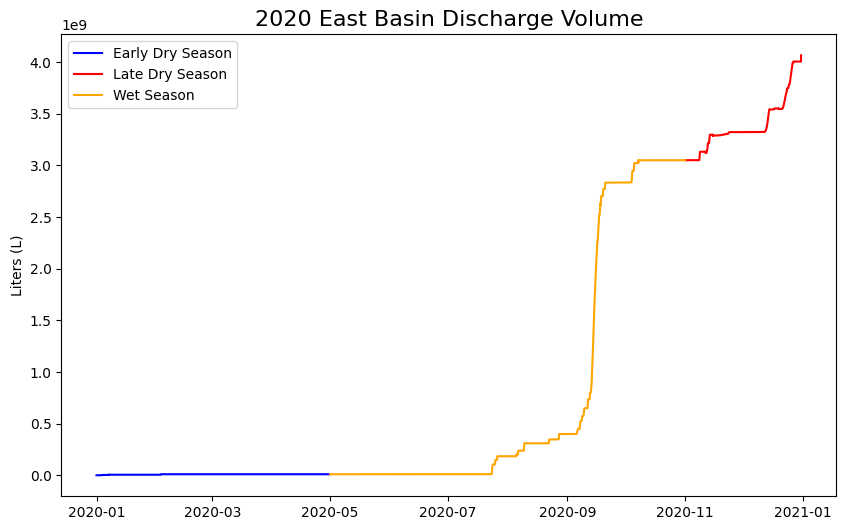

In [34]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6), sharex=True)
ax.set_title('2020 East Basin Discharge Volume', fontsize=16)
# Plot times as x-variable and parameters
ax.plot(Dry_season_filtered_dates_Early_E,Dry_season_filtered_values_Early_E,
           label='Early Dry Season', color='blue'); 
ax.plot(Dry_season_filtered_dates_Late_E,Dry_season_filtered_values_Late_E, 
           label='Late Dry Season', color='red' ); 
ax.plot(Wet_season_filtered_dates_E,Wet_season_filtered_values_E, label= 'Wet Season', color='orange');  
ax.set_ylabel('Liters (L)')
ax.legend(loc='upper left');

In [35]:
data_3= pd.read_csv('Nutrient_Data.csv')

In [36]:
Data_N = data_3.copy()
# Convert the "DATE" column to datetime format using pd.to_datetime()
Data_N['Time'] = pd.to_datetime(Data_N['Time'])

# Set the "DATE" column as the index of your DataFrame
Data_N.set_index('Time', inplace=True)

In [37]:
#Select columns only
columns_to_keep_N =  ['TN mg/l', 'TP mg/l', 'IN mg/l', 'OP mg/l', 'NH3 mg/l']

# For the two_stations DataFrame group by 'STATION' then apply .resample('Y').mean() to the selected columns only
# groupy-> Select columns -> apply method
Data_N.groupby(['Station'])[columns_to_keep_N].resample('ME').max()

TN mg/l  TP mg/l  IN mg/l  OP mg/l  NH3 mg/l
Station    Time                                                    
SanCityWQ3 2020-01-31     1.99    0.063    0.010    0.030     0.008
           2020-02-29     1.81    0.082    0.010    0.080     0.008
           2020-03-31     1.77    0.112    0.010    0.100     0.008
           2020-04-30     1.87    0.075    0.030    0.030     0.020
           2020-05-31     2.20    0.068    0.020    0.050     0.014
...                        ...      ...      ...      ...       ...
SanCityWQ8 2020-08-31      NaN      NaN      NaN      NaN       NaN
           2020-09-30      NaN      NaN      NaN      NaN       NaN
           2020-10-31     1.87    0.141    0.014    0.108     0.008
           2020-11-30     1.66    0.154    0.060    0.121     0.054
           2020-12-31     1.08    0.075    0.062    0.049     0.056

[72 rows x 5 columns]

In [38]:


# Filter the DataFrame for stations SanCityWQ3-SanCityWQ5
filtered_data_W = Data_N[Data_N['Station'].isin(['SanCityWQ3', 'SanCityWQ4', 'SanCityWQ5'])]

# Group by month and calculate the mean for the 'TN mg/l' column
monthly_mean_TN_W = filtered_data_W.groupby(pd.Grouper('Time', freq='ME'))['TN mg/l'].mean()
monthly_mean_TP_W = filtered_data_W.groupby(pd.Grouper('Time', freq='ME'))['TP mg/l'].mean()
monthly_mean_CH_W = filtered_data_W.groupby(pd.Grouper('Time', freq='ME'))['Chla ug/l'].mean()
monthly_mean_IN_W = filtered_data_W.groupby(pd.Grouper('Time', freq='ME'))['IN mg/l'].mean()
monthly_mean_OP_W = filtered_data_W.groupby(pd.Grouper('Time', freq='ME'))['OP mg/l'].mean()
monthly_mean_NH_W = filtered_data_W.groupby(pd.Grouper('Time', freq='ME'))['NH3 mg/l'].mean()


In [39]:
West_List = {'Total Nitrogen (mg/l)': monthly_mean_TN_W, 'Total Phosphorous (mg/l)': monthly_mean_TP_W, 
            'Inorganic Nitrogen (mg/l)': monthly_mean_IN_W, 'Orthophosphate (mg/l)': monthly_mean_OP_W, 'Ammonia (mg/l)': monthly_mean_NH_W} 
Nutrient_West_Basin = pd.DataFrame(West_List)

In [40]:
# Replace NaN values in each column with the mean of all the other values in that column
Nutrient_West_Basin = Nutrient_West_Basin.fillna(Nutrient_West_Basin.mean())
Nutrient_West_Basin

,Total Nitrogen (mg/l),Total Phosphorous (mg/l),Inorganic Nitrogen (mg/l),Orthophosphate (mg/l),Ammonia (mg/l)
Time,,,,,
2020-01-31,2.300000,0.073000,0.020000,0.030000,0.015000
2020-02-29,2.150000,0.073667,0.013333,0.066667,0.008000
2020-03-31,2.020000,0.102667,0.020000,0.080000,0.017667
2020-04-30,2.533333,0.289667,0.023333,0.070000,0.018667
2020-05-31,2.376667,0.086333,0.203333,0.036667,0.196000
2020-06-30,2.426667,0.089667,0.033333,0.063333,0.026000
2020-07-31,2.246667,0.114000,0.066667,0.086667,0.064000
2020-08-31,2.301667,0.111033,0.056467,0.059367,0.051200
2020-09-30,2.301667,0.111033,0.056467,0.059367,0.051200


In [41]:
# Filter the DataFrame for stations SanCityWQ3-SanCityWQ5
filtered_data_E = Data_N[Data_N['Station'].isin(['SanCityWQ6', 'SanCityWQ7', 'SanCityWQ8'])]

# Group by month and calculate the mean 
monthly_mean_TN_E = filtered_data_E.groupby(pd.Grouper('Time', freq='ME'))['TN mg/l'].mean()
monthly_mean_TP_E = filtered_data_E.groupby(pd.Grouper('Time', freq='ME'))['TP mg/l'].mean()
monthly_mean_CH_E = filtered_data_E.groupby(pd.Grouper('Time', freq='ME'))['Chla ug/l'].mean()
monthly_mean_IN_E = filtered_data_E.groupby(pd.Grouper('Time', freq='ME'))['IN mg/l'].mean()
monthly_mean_OP_E = filtered_data_E.groupby(pd.Grouper('Time', freq='ME'))['OP mg/l'].mean()
monthly_mean_NH_E = filtered_data_E.groupby(pd.Grouper('Time', freq='ME'))['NH3 mg/l'].mean()


In [42]:
East_List = {'Total Nitrogen (mg/l)': monthly_mean_TN_E, 'Total Phosphorous (mg/l)': monthly_mean_TP_E, 
            'Inorganic Nitrogen (mg/l)': monthly_mean_IN_E, 'Orthophosphate (mg/l)': monthly_mean_OP_E, 'Ammonia (mg/l)': monthly_mean_NH_E} 
Nutrient_East_Basin = pd.DataFrame(East_List)
month_names_east = Nutrient_East_Basin.index.strftime('%B')


In [43]:
# Replace NaN values in each column with the mean of all the other values in that column
Nutrient_East_Basin = Nutrient_East_Basin.fillna(Nutrient_East_Basin.mean())
Nutrient_East_Basin

,Total Nitrogen (mg/l),Total Phosphorous (mg/l),Inorganic Nitrogen (mg/l),Orthophosphate (mg/l),Ammonia (mg/l)
Time,,,,,
2020-01-31,1.886667,0.123000,0.033333,0.060000,0.026000
2020-02-29,1.763333,0.113333,0.013333,0.086667,0.008000
2020-03-31,1.703333,0.121000,0.010000,0.116667,0.008000
2020-04-30,2.616667,0.139000,0.026667,0.050000,0.022667
2020-05-31,2.640000,0.126667,0.023333,0.090000,0.010667
2020-06-30,2.383333,0.175333,0.020000,0.096667,0.015000
2020-07-31,1.923333,0.137667,0.276667,0.106667,0.036667
2020-08-31,2.078667,0.126200,0.049933,0.084233,0.020367
2020-09-30,2.078667,0.126200,0.049933,0.084233,0.020367


In [44]:

result_E_TN = Data_E_Final['Change in Discharge (L)'].mul(Nutrient_East_Basin['Total Nitrogen (mg/l)'])
result_E_TP = Data_E_Final['Change in Discharge (L)'].mul(Nutrient_East_Basin['Total Phosphorous (mg/l)'])
result_E_IN = Data_E_Final['Change in Discharge (L)'].mul(Nutrient_East_Basin['Inorganic Nitrogen (mg/l)'])
result_E_OP = Data_E_Final['Change in Discharge (L)'].mul(Nutrient_East_Basin['Orthophosphate (mg/l)'])
result_E_NH = Data_E_Final['Change in Discharge (L)'].mul(Nutrient_East_Basin['Ammonia (mg/l)'])

# Create a new DataFrame with the result
Nurtients_East_Basin_Mass = pd.DataFrame({'Total Nitrogen (kg)': result_E_TN/(1000000), 'Total Phosphorous (kg)': result_E_TP/(1000000),
                                          'Inorganic Nitrogen (kg)': result_E_IN/(1000000),
                                         'Orthophosphate (kg)': result_E_OP/(1000000), 'Ammonia (kg)': result_E_NH/(1000000)})
# Extract the month names from the datetime index
month_names_east = Nurtients_East_Basin_Mass.index.strftime('%B')

# Set the month names as the index of the DataFrame
Nurtients_East_Basin_Mass.index = month_names_east
Nurtients_East_Basin_Mass.fillna(0, inplace=True)
Nurtients_East_Basin_Mass


,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
DateTime,,,,,
January,13.585869,0.885722,0.240033,0.432059,0.187226
February,8.518991,0.547534,0.064416,0.418703,0.038649
March,0.000000,0.000000,0.000000,0.000000,0.000000
April,0.000000,0.000000,0.000000,0.000000,0.000000
May,0.000000,0.000000,0.000000,0.000000,0.000000
June,0.000000,0.000000,0.000000,0.000000,0.000000
July,336.855056,24.111116,48.455753,18.681736,6.421847
August,446.892212,27.131718,10.735159,18.109311,4.378626
September,5061.649574,307.302843,121.589979,205.112067,49.593776


In [45]:
print('Total Sums for East Basin:')
Nurtients_East_Basin_Mass.sum()

Total Sums for East Basin:


Total Nitrogen (kg)        7931.177349
Total Phosphorous (kg)      477.975096
Inorganic Nitrogen (kg)     228.642108
Orthophosphate (kg)         318.131834
Ammonia (kg)                 99.796744
dtype: float64

In [46]:
print('Wet Season Sums for East Basin:')
Nurtients_East_Basin_Mass[4:10].sum()

Wet Season Sums for East Basin:


Total Nitrogen (kg)        6472.123093
Total Phosphorous (kg)      386.647737
Inorganic Nitrogen (kg)     184.158888
Orthophosphate (kg)         264.471008
Ammonia (kg)                 62.478546
dtype: float64

In [47]:
print('Dry Season Sums for East Basin:')
Nurtients_East_Basin_Mass[0:4].sum()+Nurtients_East_Basin_Mass[10:12].sum()

Dry Season Sums for East Basin:


Total Nitrogen (kg)        1459.054256
Total Phosphorous (kg)       91.327359
Inorganic Nitrogen (kg)      44.483220
Orthophosphate (kg)          53.660825
Ammonia (kg)                 37.318199
dtype: float64

In [48]:
Wet_Season_East_Final = Nurtients_East_Basin_Mass.iloc[list(range(4, 10))]

Wet_Season_East_Final

,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
DateTime,,,,,
May,0.000000,0.000000,0.000000,0.000000,0.000000
June,0.000000,0.000000,0.000000,0.000000,0.000000
July,336.855056,24.111116,48.455753,18.681736,6.421847
August,446.892212,27.131718,10.735159,18.109311,4.378626
September,5061.649574,307.302843,121.589979,205.112067,49.593776
October,626.726251,28.102060,3.377997,22.567895,2.084296


In [49]:
Dry_Season_East_Final = Nurtients_East_Basin_Mass.iloc[list(range(0, 4)) + list(range(10, 12))]
Dry_Season_East_Final

,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
DateTime,,,,,
January,13.585869,0.885722,0.240033,0.432059,0.187226
February,8.518991,0.547534,0.064416,0.418703,0.038649
March,0.000000,0.000000,0.000000,0.000000,0.000000
April,0.000000,0.000000,0.000000,0.000000,0.000000
November,443.365584,32.162176,8.994507,25.802423,7.359142
December,993.583812,57.731927,35.184265,27.007640,29.733181


In [50]:

result_W_TN = Data_W_Final['Change in Discharge (L)'].mul(Nutrient_West_Basin['Total Nitrogen (mg/l)'])
result_W_TP = Data_W_Final['Change in Discharge (L)'].mul(Nutrient_West_Basin['Total Phosphorous (mg/l)'])
result_W_IN = Data_W_Final['Change in Discharge (L)'].mul(Nutrient_West_Basin['Inorganic Nitrogen (mg/l)'])
result_W_OP = Data_W_Final['Change in Discharge (L)'].mul(Nutrient_West_Basin['Orthophosphate (mg/l)'])
result_W_NH = Data_W_Final['Change in Discharge (L)'].mul(Nutrient_West_Basin['Ammonia (mg/l)'])

# Create a new DataFrame with the result
Nurtients_West_Basin_Mass = pd.DataFrame({'Total Nitrogen (kg)': result_W_TN/(1000000), 'Total Phosphorous (kg)': result_W_TP/(1000000), 
                                           'Inorganic Nitrogen (kg)': result_W_IN/(1000000),
                                         'Orthophosphate (kg)': result_W_OP/(1000000), 'Ammonia (kg)': result_W_NH/(1000000)})

# Extract the month names from the datetime index
month_names_west = Nurtients_West_Basin_Mass.index.strftime('%B')

# Set the month names as the index of the DataFrame
Nurtients_West_Basin_Mass.index = month_names_west
Nurtients_West_Basin_Mass.fillna(0, inplace=True)
Nurtients_West_Basin_Mass

,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
Time America/New_York UTC-04:00,,,,,
January,20.186166,0.640691,0.175532,0.263298,0.131649
February,37.749704,1.293439,0.234107,1.170533,0.140464
March,0.000000,0.000000,0.000000,0.000000,0.000000
April,0.000000,0.000000,0.000000,0.000000,0.000000
May,5.720667,0.207805,0.489426,0.088257,0.471775
June,0.000000,0.000000,0.000000,0.000000,0.000000
July,0.000000,0.000000,0.000000,0.000000,0.000000
August,626.342900,30.215035,15.366037,16.155202,13.932841
September,9560.628653,461.208603,234.550397,246.596374,212.673796


In [51]:
print('Total Sums for West Basin:')
Nurtients_West_Basin_Mass.sum()

Total Sums for West Basin:


Total Nitrogen (kg)        12420.221943
Total Phosphorous (kg)       559.924433
Inorganic Nitrogen (kg)      296.604213
Orthophosphate (kg)          320.985000
Ammonia (kg)                 268.187626
dtype: float64

In [52]:
print('Wet Season Sums for West Basin:')
Nurtients_West_Basin_Mass[4:10].sum()

Wet Season Sums for West Basin:


Total Nitrogen (kg)        11690.349691
Total Phosphorous (kg)       530.305521
Inorganic Nitrogen (kg)      263.040419
Orthophosphate (kg)          300.589430
Ammonia (kg)                 236.939531
dtype: float64

In [53]:
print('Dry Season Sums for West Basin:')
Nurtients_West_Basin_Mass[0:4].sum()+Nurtients_West_Basin_Mass[10:12].sum()

Dry Season Sums for West Basin:


Total Nitrogen (kg)        729.872251
Total Phosphorous (kg)      29.618912
Inorganic Nitrogen (kg)     33.563794
Orthophosphate (kg)         20.395570
Ammonia (kg)                31.248095
dtype: float64

In [54]:
Wet_Season_West_Final = Nurtients_West_Basin_Mass.iloc[list(range(4, 10))]

Wet_Season_West_Final

,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
Time America/New_York UTC-04:00,,,,,
May,5.720667,0.207805,0.489426,0.088257,0.471775
June,0.000000,0.000000,0.000000,0.000000,0.000000
July,0.000000,0.000000,0.000000,0.000000,0.000000
August,626.342900,30.215035,15.366037,16.155202,13.932841
September,9560.628653,461.208603,234.550397,246.596374,212.673796
October,1497.657471,38.674077,12.634559,37.749597,9.861119


In [55]:
Dry_Season_West_Final = Nurtients_West_Basin_Mass.iloc[list(range(0, 4)) + list(range(10, 12))]
Dry_Season_West_Final

,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
Time America/New_York UTC-04:00,,,,,
January,20.186166,0.640691,0.175532,0.263298,0.131649
February,37.749704,1.293439,0.234107,1.170533,0.140464
March,0.000000,0.000000,0.000000,0.000000,0.000000
April,0.000000,0.000000,0.000000,0.000000,0.000000
November,575.396952,20.980178,30.016195,17.864310,28.146674
December,96.539430,6.704603,3.137960,1.097429,2.829308


In [56]:
result_FINAL_TN = Nurtients_West_Basin_Mass['Total Nitrogen (kg)'].add(Nurtients_East_Basin_Mass['Total Nitrogen (kg)'])
result_FINAL_TP = Nurtients_West_Basin_Mass['Total Phosphorous (kg)'].add(Nurtients_East_Basin_Mass['Total Phosphorous (kg)'])
result_FINAL_IN = Nurtients_West_Basin_Mass['Inorganic Nitrogen (kg)'].add(Nurtients_East_Basin_Mass['Inorganic Nitrogen (kg)'])
result_FINAL_OP = Nurtients_West_Basin_Mass['Orthophosphate (kg)'].add(Nurtients_East_Basin_Mass['Orthophosphate (kg)'])
result_FINAL_NH = Nurtients_West_Basin_Mass['Ammonia (kg)'].add(Nurtients_East_Basin_Mass['Ammonia (kg)'])

# Create a new DataFrame with the result
Nurtients_FINAL = pd.DataFrame({'Total Nitrogen (kg)': result_FINAL_TN, 'Total Phosphorous (kg)': result_FINAL_TP, 
                                           'Inorganic Nitrogen (kg)': result_FINAL_IN,
                                         'Orthophosphate (kg)': result_FINAL_OP, 'Ammonia (kg)': result_FINAL_NH})
Nurtients_FINAL.fillna(0, inplace=True)
Nurtients_FINAL

,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
Time America/New_York UTC-04:00,,,,,
January,33.772035,1.526413,0.415565,0.695357,0.318875
February,46.268695,1.840974,0.298523,1.589236,0.179114
March,0.000000,0.000000,0.000000,0.000000,0.000000
April,0.000000,0.000000,0.000000,0.000000,0.000000
May,5.720667,0.207805,0.489426,0.088257,0.471775
June,0.000000,0.000000,0.000000,0.000000,0.000000
July,336.855056,24.111116,48.455753,18.681736,6.421847
August,1073.235111,57.346753,26.101197,34.264513,18.311468
September,14622.278227,768.511446,356.140376,451.708441,262.267572


In [57]:
print('Total Sums for both basins:')
Nurtients_FINAL.sum()

Total Sums for both basins:


Total Nitrogen (kg)        20351.399292
Total Phosphorous (kg)      1037.899528
Inorganic Nitrogen (kg)      525.246321
Orthophosphate (kg)          639.116833
Ammonia (kg)                 367.984370
dtype: float64

In [58]:
print('Wet Season Sums for both basins:')
Nurtients_FINAL[4:10].sum()

Wet Season Sums for both basins:


Total Nitrogen (kg)        18162.472784
Total Phosphorous (kg)       916.953257
Inorganic Nitrogen (kg)      447.199308
Orthophosphate (kg)          565.060438
Ammonia (kg)                 299.418076
dtype: float64

In [59]:
print('Dry Season Sums for both basins:')
Dry_Season_Final=Nurtients_FINAL[0:4].sum()+Nurtients_FINAL[10:12].sum()
Dry_Season_Final

Dry Season Sums for both basins:


Total Nitrogen (kg)        2188.926508
Total Phosphorous (kg)      120.946271
Inorganic Nitrogen (kg)      78.047014
Orthophosphate (kg)          74.056395
Ammonia (kg)                 68.566294
dtype: float64

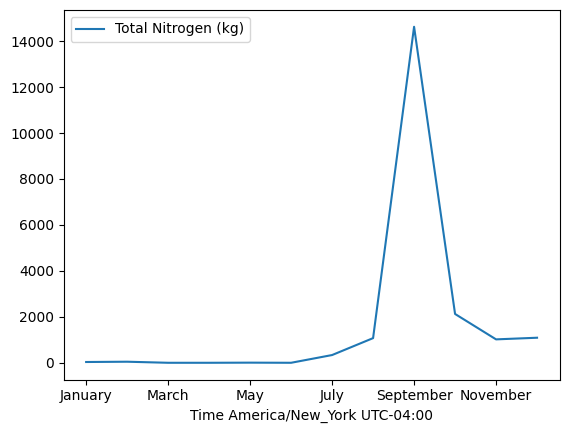

In [60]:

data_to_plot=['Total Nitrogen (kg)']

#Plot method
Nurtients_FINAL[data_to_plot].plot();

In [61]:
Dry_Season_Final = Nurtients_FINAL.iloc[list(range(0, 4)) + list(range(10, 12))]

Dry_Season_Final

,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
Time America/New_York UTC-04:00,,,,,
January,33.772035,1.526413,0.415565,0.695357,0.318875
February,46.268695,1.840974,0.298523,1.589236,0.179114
March,0.000000,0.000000,0.000000,0.000000,0.000000
April,0.000000,0.000000,0.000000,0.000000,0.000000
November,1018.762536,53.142353,39.010702,43.666733,35.505816
December,1090.123242,64.436531,38.322225,28.105068,32.562490


In [62]:
Wet_Season_Final = Nurtients_FINAL.iloc[list(range(4, 10))]

Wet_Season_Final

,Total Nitrogen (kg),Total Phosphorous (kg),Inorganic Nitrogen (kg),Orthophosphate (kg),Ammonia (kg)
Time America/New_York UTC-04:00,,,,,
May,5.720667,0.207805,0.489426,0.088257,0.471775
June,0.000000,0.000000,0.000000,0.000000,0.000000
July,336.855056,24.111116,48.455753,18.681736,6.421847
August,1073.235111,57.346753,26.101197,34.264513,18.311468
September,14622.278227,768.511446,356.140376,451.708441,262.267572
October,2124.383722,66.776137,16.012556,60.317492,11.945415


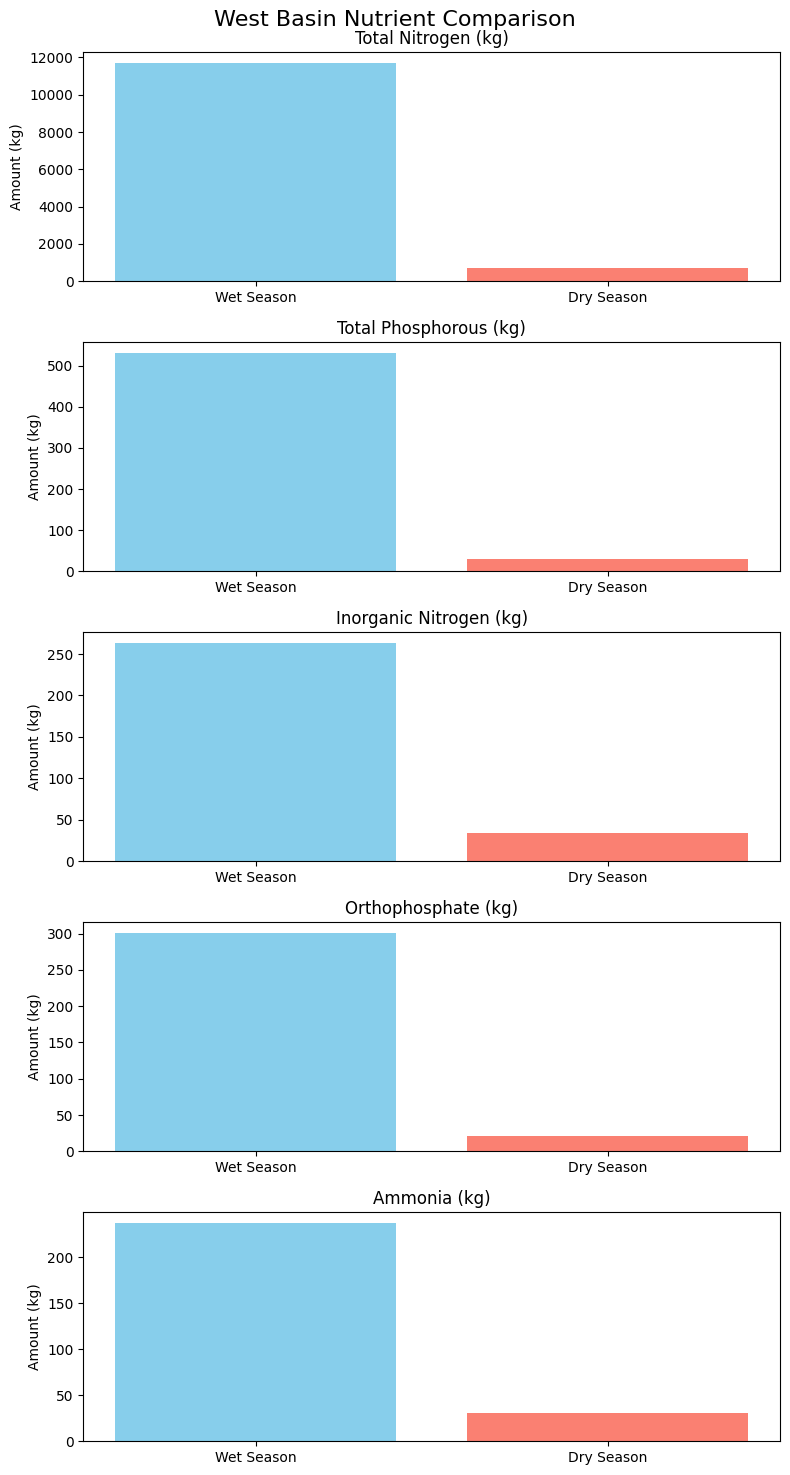

In [63]:


# Calculate the sum of each column for both data frames
sum_wet_West = Wet_Season_West_Final.sum()
sum_dry_West = Dry_Season_West_Final.sum()

# Create 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))

# List of columns
columns = ['Total Nitrogen (kg)', 'Total Phosphorous (kg)', 'Inorganic Nitrogen (kg)', 'Orthophosphate (kg)', 'Ammonia (kg)']

# Plot the summation of each column for Wet_Season_West_Final
for i, col in enumerate(columns):
    axes[i].bar('Wet Season', sum_wet_West[col], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_ylabel('Amount (kg)')

# Plot the summation of each column for Dry_Season_West_Final
for i, col in enumerate(columns):
    axes[i].bar('Dry Season', sum_dry_West[col], color='salmon')

# Adjust layout

plt.suptitle('West Basin Nutrient Comparison', fontsize=16)
plt.tight_layout()
# Show the plot
plt.show()



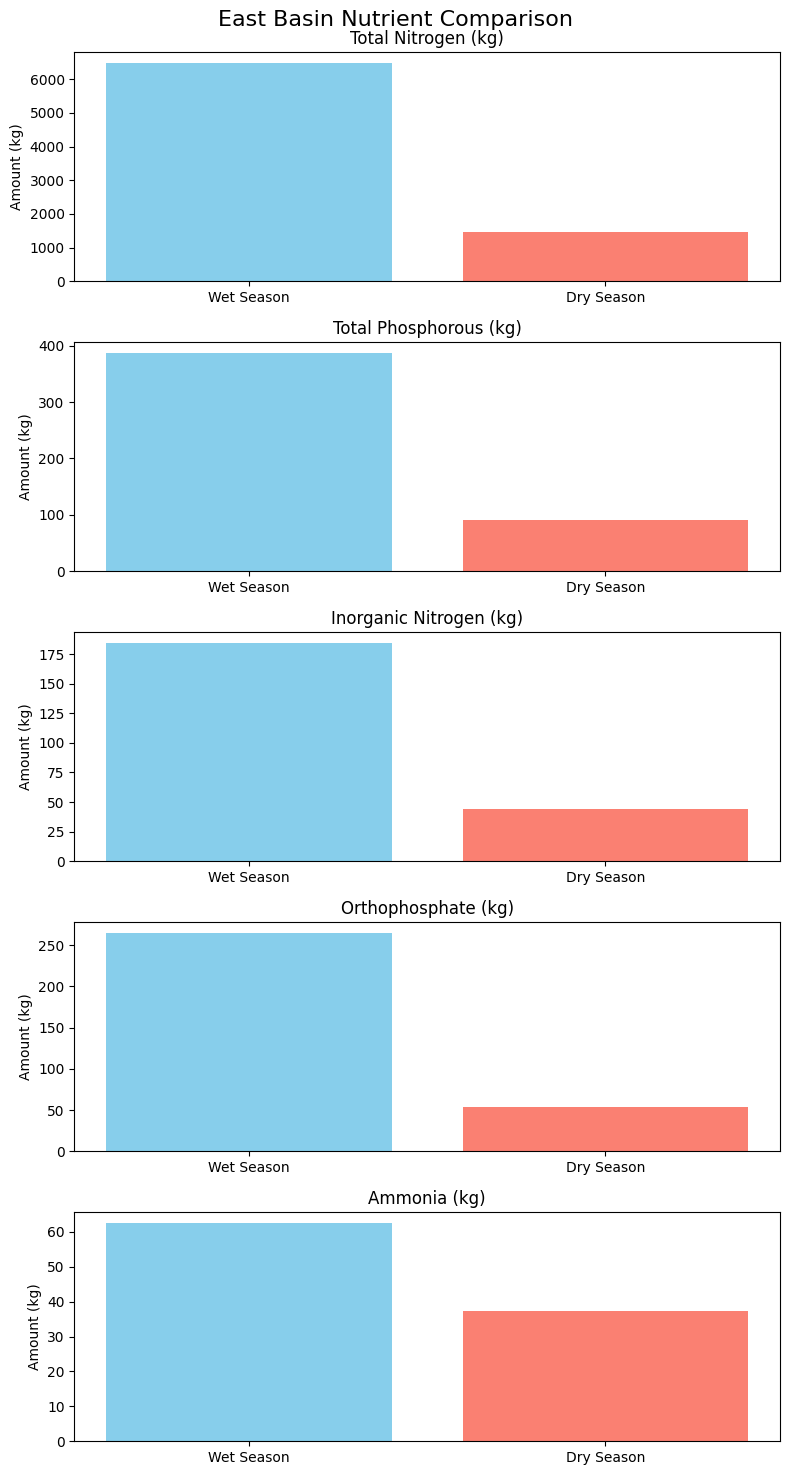

In [64]:

# Calculate the sum of each column for both data frames
sum_wet_East = Wet_Season_East_Final.sum()
sum_dry_East = Dry_Season_East_Final.sum()

# Create 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))

# List of columns
columns = ['Total Nitrogen (kg)', 'Total Phosphorous (kg)', 'Inorganic Nitrogen (kg)', 'Orthophosphate (kg)', 'Ammonia (kg)']

# Plot the summation of each column for Wet_Season_West_Final
for i, col in enumerate(columns):
    axes[i].bar('Wet Season', sum_wet_East[col], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_ylabel('Amount (kg)')

# Plot the summation of each column for Dry_Season_West_Final
for i, col in enumerate(columns):
    axes[i].bar('Dry Season', sum_dry_East[col], color='salmon')

# Adjust layout

plt.suptitle('East Basin Nutrient Comparison', fontsize=16)
plt.tight_layout()
# Show the plot
plt.show()


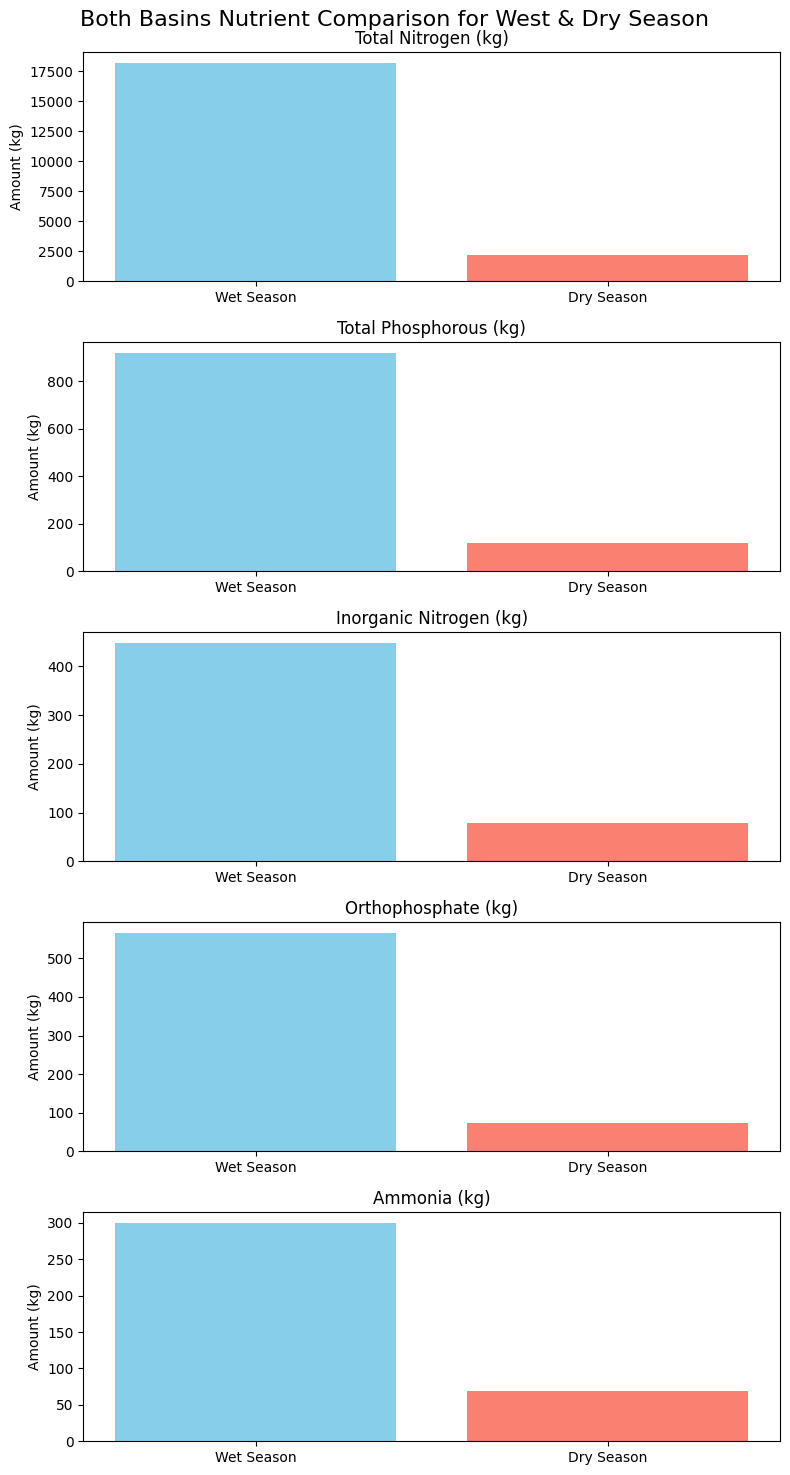

In [65]:
# Calculate the sum of each column for both data frames
sum_wet_Final = Wet_Season_Final.sum()
sum_dry_Final = Dry_Season_Final.sum()

# Create 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))

# List of columns
columns = ['Total Nitrogen (kg)', 'Total Phosphorous (kg)', 'Inorganic Nitrogen (kg)', 'Orthophosphate (kg)', 'Ammonia (kg)']

# Plot the summation of each column for Wet_Season_West_Final
for i, col in enumerate(columns):
    axes[i].bar('Wet Season', sum_wet_Final[col], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_ylabel('Amount (kg)')

# Plot the summation of each column for Dry_Season_West_Final
for i, col in enumerate(columns):
    axes[i].bar('Dry Season', sum_dry_Final[col], color='salmon')

# Adjust layout

plt.suptitle('Both Basins Nutrient Comparison for West & Dry Season', fontsize=16)
plt.tight_layout()
# Show the plot
plt.show()

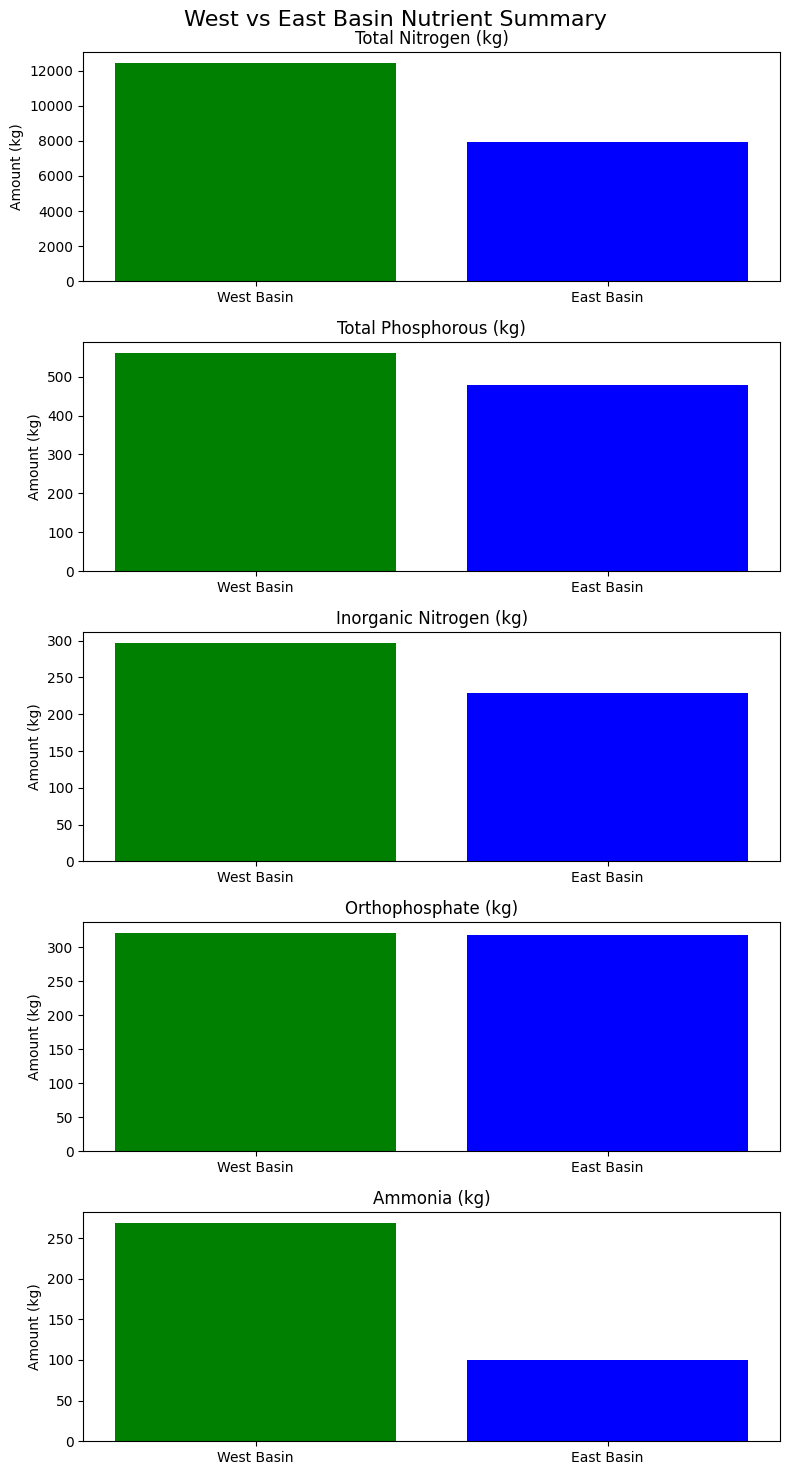

In [66]:


# Calculate the sum of each column for both data frames
sum_west = Nurtients_West_Basin_Mass.sum()
sum_east = Nurtients_East_Basin_Mass.sum()

# Create 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))

# List of columns
columns = ['Total Nitrogen (kg)', 'Total Phosphorous (kg)', 'Inorganic Nitrogen (kg)', 'Orthophosphate (kg)', 'Ammonia (kg)']

# Plot the summation of each column for Nurtients_West_Basin_Mass
for i, col in enumerate(columns):
    axes[i].bar('West Basin', sum_west[col], color='green')
    axes[i].set_title(col)
    axes[i].set_ylabel('Amount (kg)')

# Plot the summation of each column for Nurtients_East_Basin_Mass
for i, col in enumerate(columns):
    axes[i].bar('East Basin', sum_east[col], color='blue')

# Add the main title
plt.suptitle('West vs East Basin Nutrient Summary', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
